#CLUSTERING K-MEANS UNTUK CUSTOMER SEGMENTATION PADA MALL X

# 1. Business Understanding

Sebuah Mall, sebut saja Mall X, belum pernah membuat segmentasi pelanggan (customer segmentation) di lingkungan mereka. Oleh karena itu saya akan membuatkan customer segmentation dengan metode K means clustering untuk Mall X.

Tujuan dan manfaat dari segmentasi pelanggan bagi Mall X =

1. Memberikan gambaran pembagian segmentasi pelanggan menjadi beberapa kelompok segmen berdasarkan kemiripan

2. Dapat memberikan gambaran strategi baru terhadap Mall X untuk dapat memaksimalkan keuntungan berdasarkan segmentasi pelanggan.

#2. Data Understanding

##2.1 Import Libraries

In [ ]:
# Import Data
import pandas as pd # Data Manipulating
import numpy as np # Support large multi-dimensional array
import matplotlib.pyplot as plt #Basic Plot di Python
import seaborn as sns #plot alternatif dari matplotlib dengan beberapa fitur berebeda
pd.options.mode.chained_assignment = None  # default='warn
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)
from scipy import stats #keperluan perhitungan statistik
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans, MiniBatchKMeans

##2.2 Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mall = pd.read_csv("/content/drive/MyDrive/latian lagi/Mall_Customers.csv") # upload dulu dari lokal & Isi ya
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##2.3 Exploratory Data Analysis

###2.3.1 Explore Data

In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dapat dilihat dari syntax diatas, tidak ditemukan adanya data yang hilang (semuanya lengkap 200 data). Serta diketahui juga bahwa terdapat 5 variable dengan 4 variable berjenis integer dan 1 variable berjenis string yaitu gender

In [ ]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.00,100.50,57.88,1.00,50.75,100.50,150.25,200.00
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


Diketahui summary statistics dari data mall, yaitu berupa mean, median, standar deviasi, nilai max, min, dll.

1. Umur memiliki rentang dari 18 sampai 70

2. Annual income memiliki rentang dari 15 hingga 137

3. Serta spending score memiliki rentang dari 1 hingga 99

In [ ]:
mall.shape

(200, 5)

In [ ]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###2.3.2 Data Visualization

####2.3.2.1 Box Plot

Setelah memahami bentuk serta mengecek kelengkapan data, selanjutnya kita mempersiapkan data dengan mengecek outliers menggunakan boxplot

In [ ]:
mall_1 = mall.drop(['CustomerID'], axis=1)


In [ ]:
mall_1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


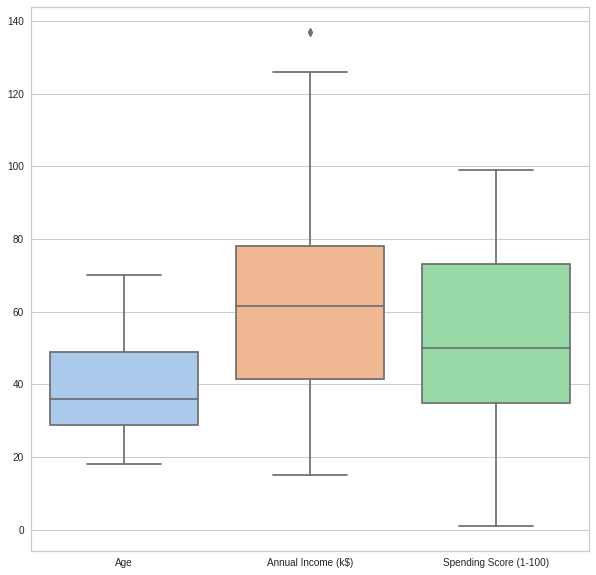

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

warna = sns.color_palette('pastel')   #ini buat warna doang
sns.boxplot(data=mall_1, palette=(warna))

didapatkan insight bahwa, terdapat outliers di luar box plot pada variable Annual Income ($). Sedangkan data data variable lainnya aman dari outliers

####2.3.2.2 Heatmap

In [ ]:
mall_1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.00,-0.01,-0.33
Annual Income (k$),-0.01,1.00,0.01
Spending Score (1-100),-0.33,0.01,1.00


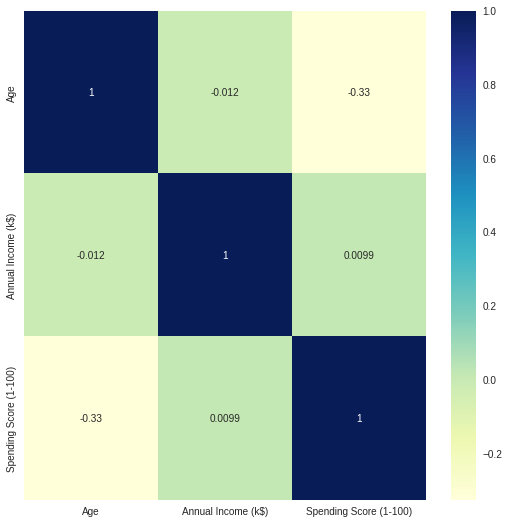

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(mall_1.corr(), annot=True,cmap="YlGnBu")

Dari heatmap di atas ditemukan insight bahwa tidak terdapat korelasi yang signifikan antara variable, karena nilai korelasi yang didapat tidak ada yang mendekati angka satu

####2.3.2.3 Pie Chart

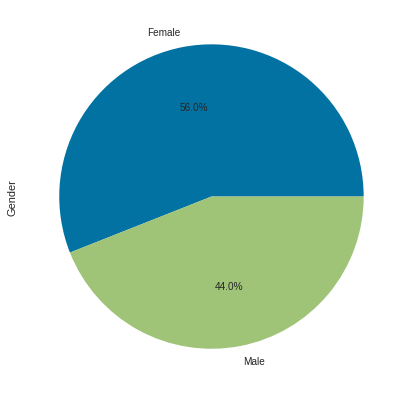

In [ ]:
mall['Gender'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

Dari pie chart diatas, diperoleh fakta bahwa jumlah customer pada Mall X didominasi oleh perempuan, dengan jumlah 56%, dan laki laki hanya 44%

####2.3.2.4 Scatter Plot

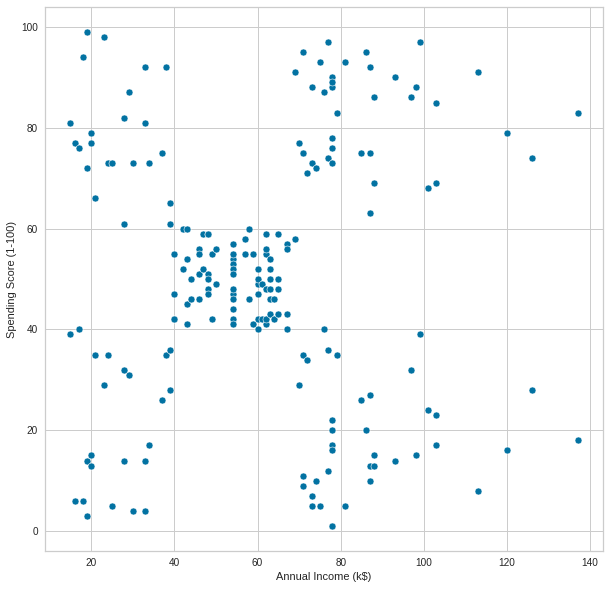

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data= mall, x="Annual Income (k$)", y="Spending Score (1-100)")

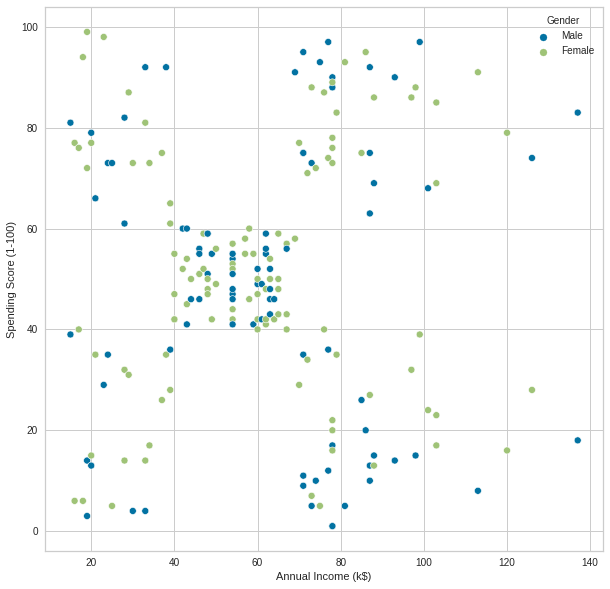

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data= mall, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

Dari kedua scatterplot di atas diperoleh informasi bahwa :

1. persebaran antara variable gender terlihat merata, sehingga tidak perlu melibatkan variable ini nantinya saat clustering

2. Kumpulan data tersebar ke dalam 5 daerah yang terlihat jelas jaraknya, sehingga bagus untuk clustering K means

#3. Data Preparation

##3.1 Menghilangkan Outliers dengan Metode Z-Score

In [ ]:
income = mall[['Annual Income (k$)']]

In [ ]:
income.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


In [ ]:
data_zscore=income[(np.abs(stats.zscore(income)) < 3).all(axis=1)] # mengambil data yang masuk kedalam 3 sigma

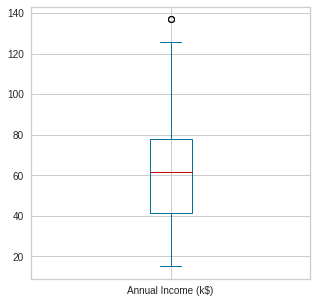

In [ ]:
# visualisasi
data_zscore.plot(kind='box', figsize=(5,5))
plt.show()
#outliers yang masih ada harus dihilangkan dgn IQR (knp masih ada ?  karena yang tadi hanya memakai 3 sigma, belum IQR, sehingga masih tersisa)

Karena ternyata masih terdapat Outliers, maka akan dilanjutkan dengan metode IQR untuk menghilangkan outliers secara keseluruhan

##3.2 Menghilangkan Outliers dengan Metode IQR

Karena outliers hanya berjumlah 1

In [ ]:
#cari Q1, Q3, dan interquartile range
Q1 = income.quantile(q=.25)
Q3 = income.quantile(q=.75)
IQR = income.apply(stats.iqr) #IQR=Q3-Q1 atau bisa menggunakan stats.iqr dari scipy

#TODO ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
data_iqr = income[~((income< (Q1-1.5*IQR)) | (income > (Q3+1.5*IQR))).any(axis=1)]
data_iqr
#TO TRY, coba hapus simbol ~ di coding !!

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
193,113
194,120
195,120
196,126


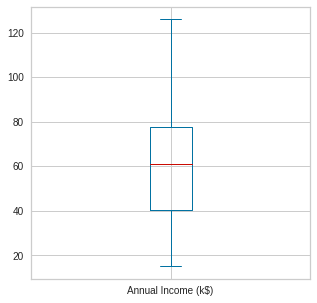

In [ ]:
data_iqr.plot(kind='box', figsize=(5,5))
plt.show()

Outliers sudah berhasil dihilangkan

##3.3 Bandingkan antara Z-Score dan IQR

In [ ]:
data_zscore.columns = ['Z-Score']
data_iqr.columns = ['IQR']

In [ ]:
hasil = pd.concat([income, data_zscore,data_iqr], axis=1)
hasil.head()

,Annual Income (k$),Z-Score,IQR
0,15,15,15.00
1,15,15,15.00
2,16,16,16.00
3,16,16,16.00
4,17,17,17.00


In [ ]:
hasil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Annual Income (k$)  200 non-null    int64  
 1   Z-Score             200 non-null    int64  
 2   IQR                 198 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.2 KB


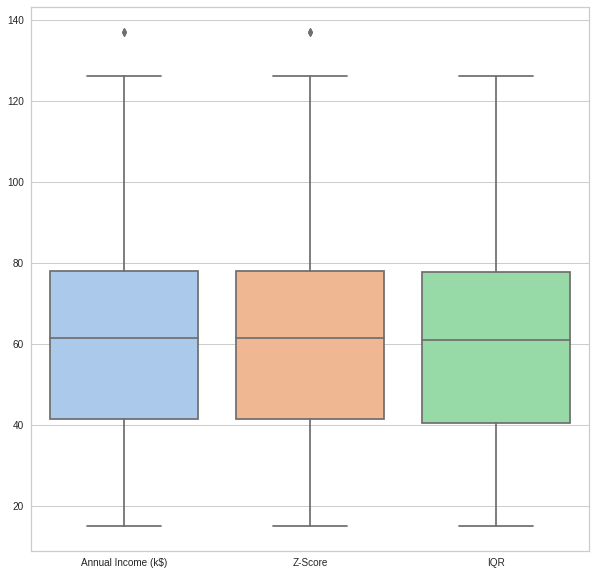

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=hasil, palette=warna)

dapat dilihat perbedaannya pada outliers

-kiri data asli, tengah hasil z score, kanan hasil IQR

-yang di mana data hasil pengolahan IQR sudah bersih dari outliers

##3.4 Memilih Kolom yang akan Dipakai

In [ ]:
X= mall.iloc[:, [3,4]].values # pilih atribute untuk dimasukkan ke dalam clustering.
                              # 3,4 artinya kolom 3 dan 4 yang merupakan income dan spending score

1. Karena tidak ditemukan adanya korelasi antara spending score dan annual income,

2. Kumpulan data scatter plotnya tersebar secara merata ke 5 daerah yang jaraknya terlihat jelas,

3. Serta variable gender tidak memberikan pengaruh signifikan dalam persebaran data dalam scatter plot,

Maka akan dilakukan clustering K-Means dengan menggunakan variable Annual Income dan Spending Score saja.

##3.5 Standarisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(X)

#4. Modelling

##4.1 Elbow Method

In [ ]:


from sklearn.cluster import KMeans     #syntax untuk memanggil Kmeans
wcss=[]

for i in range(1,11):                 #1, 11 artinya jumlah clustering. umumnya cluster sampai 10
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

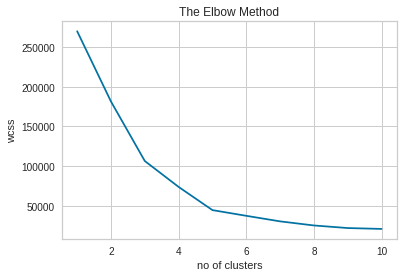

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# visualizing elbow method

dari metode elbow method tersebut, didapatkan insight bahwa grafik membentuk siku dua kali, yaitu pada nilai cluster 3 dan 5. Namun karena nilai cluster 5 lebih besar daripada 3, maka kita gunakan 5 cluster

##4.2 Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.53976103063432)
For n_clusters = 7, silhouette score is 0.5288104473798049)
For n_clusters = 8, silhouette score is 0.4558493609925033)
For n_clusters = 9, silhouette score is 0.45780808918889493)
For n_clusters = 10, silhouette score is 0.46101684512909263)
For n_clusters = 11, silhouette score is 0.437841976811071)


dari slhouette analysis juga telah terbukti bahwa centroid yang optimal yaitu berjumlah 5, terbukti dari skornya yang terbesar

##4.3 K-Means Clustering

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

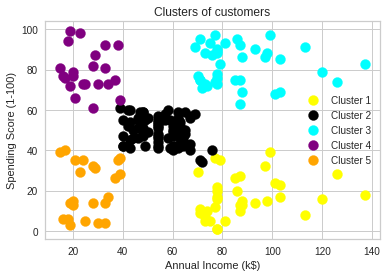

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'black', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

di sini dapat dilihat bahwa terdapat 5 clustering customer pada mall tersebut :

Cluster 1 (Kuning) -> Penghasilan tinggi, pengeluaran rendah

cluster 2 (Hitam) -> rata rata dalam penghasilan dan pengeluaran

cluster 3 (Biru Muda) -> Penghasilan tinggi, pengeluaran tinggi

cluster 4 (Ungu) -> Penghasilan rendah, pengeluaran tinggi

Cluster 5 (Jingga) -> Penghasilan rendah, pengeluaran rendah

#5. Evaluation

##5.1 Cluster Cardinality

In [ ]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)
kmeans_5.fit(X)


KMeans(n_clusters=5, random_state=11)

In [ ]:
N = clusters_of_5=kmeans_5.predict(X)

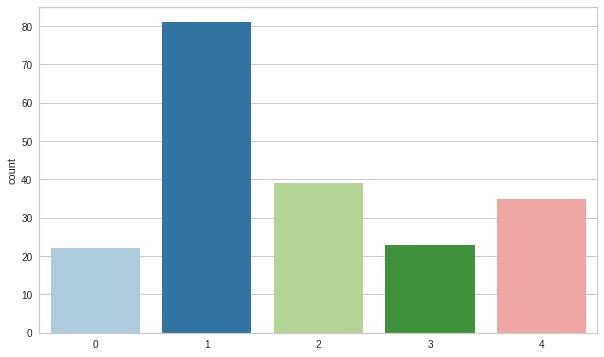

In [ ]:
fig = plt.subplots(figsize=(10, 6))
sns.countplot(x=N, palette="Paired")
plt.show()

**Dikarenakan Cluster K-means pada modelling tidak sinkron dengan yang di evaluation, maka dibuatkan tranlasi**

clust 4 = 1                             (35 data)

clust 1 = 2                             (83 data)

Clust 2 = 3                             (37 data)

Clust 0 = 4	                            (22 data)

Clust 3	= 5	                            (23 data)


**Contoh cara membaca.**

Clust 4 = 1. artinya cluster 4 di evaluation sama dengan cluster 1 di modelling

**Insight**

Dari diagram Cluster Cardinality di atas, terlihat persebaran data dalam tiap cluster K-Means yang telah dikerjakan. dengan informasi sebagai berikut.

1. Data telah tersebar secara merata, kecuali pada cluster ke 2 yaitu cluster pengunjung mall dengan income menengah, pengeluaran juga menengah.

2. Cluster ke 2 tersebut memiliki jumlah persebaran yang tertinggi yaitu sejumlah 83 customer, sedangkan cluster lainnya hanya memiliki rata rata sebesar 29 customer.

##5.2 Magnitude

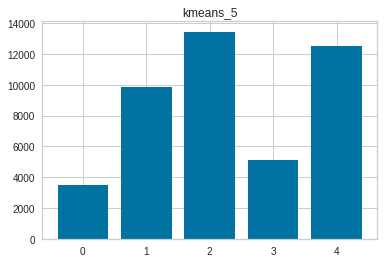

In [ ]:
# Membuat variable distances dengan transform model kmeans_5
distances = kmeans_5.transform(X)
# Membuat model predict dari kmeans_5
preds = kmeans_5.predict(X)
# Menghitung intertia_per_cluster (pakai rumus dari tim konten full sama bawahnya)
inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(kmeans_5.n_clusters)])

# Visualisasi dengan plt
plt.bar(x=range(kmeans_5.n_clusters), height=inertia_per_cluster)
plt.title("kmeans_5")
plt.show()

Dari Diagram Magnitude tersebut didapatkan insight bahwa

1. Untuk Cluster 4 dan 5 memiliki nilai magnitude yang rendah, dikarenakan jumlah data mereka yang sedikit (22 dan 23) serta karena jarak antar sebaran data yang sempit

2. Untuk Cluster 1 dan 3 memiliki nilai magnitude yang tinggi, dikarenakan beberapa sebaran data mereka tersebar cukup jauh, juga jumlah data mereka yang lebih banyak daripada data 4 dan 5 tadi (35 dan 37)

3. Sedangkan untuk Cluster 2, memiliki nilai magnitude yang tinggi padahal jarak sebaran data terlihat sempit, disebabkan oleh jumlah data mereka yang sangat banyak (83 data) yang menyebabkan akumulasi jaraknya (magnitude) menjadi besar pula

**Dikarenakan Magnitude dan cardinality sudah sinkron/selaras, maka model dianggap telah cukup bagus**

#6. Conclussions & Suggestion

##6.1 Kesimpulan

Dari seluruh pengerjaan Customer Segmentation Clustering pada Mall X terdapat beberapa hal yang dapat disimpulkan, diantaranya....

1. Customer Segmentation pada Mall X terbagi menjadi 5 Cluster berdasarkan variable Annual Income dan Spending Score ($)

2. Clustering dengan jumlah terbanyak berdasarkan urutan, yang pertama yaitu customer dengan penghasilan dan pengeluaran yang menengah (83 data), diikuti dengan customer berpenghasilan tinggi pengeluaran tinggi dan berpenghasilan tinggi pengeluaran rendah (keduanya tidak jauh beda yaitu 35 dan 37 data), lalu urutan yang terakhir adalah customer berpenghasilan rendah pengeluaran tinggi dan berpenghasilan rendah pengeluaran rendah (22 dan 23 data).


##6.2 Saran

Saran untuk Mall X

Jika ditinjau dari jumlah customer terbanyak adalah customer dengan penghasilan dan pengeluaran sedang. Namun yang perlu jadi pusat perhatian di sini ialah Customer dengan pengeluaran terbanyak yang jika diakumulasikan berjumlah 57 (35 dari penghasilan tinggi, 22 dari penghasilan rendah), serta akumulasi customer penghasilan tinggi yaitu sejumlah 75.

Dari 3 faktor ini =

1. Customer terbanyak yaitu dari kalangan menengah

2. Customer dengan pengeluaran terbesar terbagi menjadi penghasilan tinggi dan rendah (rasio 3 : 2)

3. Akumulasi customer berpenghasilan tinggi cukup mendekati jumlah kalangan menengah

maka diberikan saran agar Mall X mendesain Mall nya agar terlihat dan terasa mewah agar seluruh customer berpenghasilan tinggi betah, namun untuk brand yang diperdagangkan dalam mall tersebut harus didominasi oleh brand yang terjangkau agar customer kalangan menengah, customer penghasilan tinggi tapi pengeluaran rendah, serta customer penghasilan rendah tapi pengeluaran tinggi dapat berbelanja di mall tersebut.